In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('customer_churn.csv')

In [3]:
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2785,4016-BJKTZ,Female,0,No,No,25,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,No,Electronic check,108.9,2809.05,No
4448,6543-XRMYR,Female,1,No,No,30,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.7,2967.35,Yes
776,9505-SQFSW,Female,0,Yes,Yes,3,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,40.3,92.5,No
137,3774-VBNXY,Female,0,Yes,Yes,64,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.2,1277.75,No
1465,1866-OBPNR,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Credit card (automatic),74.6,74.6,No


In [4]:
data.drop('customerID', axis = 'columns', inplace = True)

In [5]:
data.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4979,Female,0,Yes,Yes,56,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.45,1385.85,No
5612,Female,0,No,No,45,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Credit card (automatic),62.55,2796.45,No
2228,Female,1,Yes,No,70,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),104.45,7349.35,No


In [6]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
pd.to_numeric(data.TotalCharges, errors = 'coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
data[pd.to_numeric(data.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
data1 = data[data['TotalCharges'] != ' ']
data1.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1552,Female,0,Yes,Yes,31,Yes,Yes,DSL,No,Yes,No,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),80.55,2471.6,No
6611,Male,0,Yes,Yes,29,Yes,Yes,DSL,Yes,No,No,Yes,Yes,No,One year,No,Bank transfer (automatic),69.05,1958.45,No
6297,Female,0,Yes,Yes,64,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,113.35,7222.75,No


In [11]:
data1.TotalCharges = pd.to_numeric(data1.TotalCharges, errors = 'coerce')

C:\Users\Asus\AppData\Local\Temp\ipykernel_29096\2303357700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.TotalCharges = pd.to_numeric(data1.TotalCharges, errors = 'coerce')


In [12]:
data1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [13]:
data1[data1.TotalCharges.isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [14]:
data1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

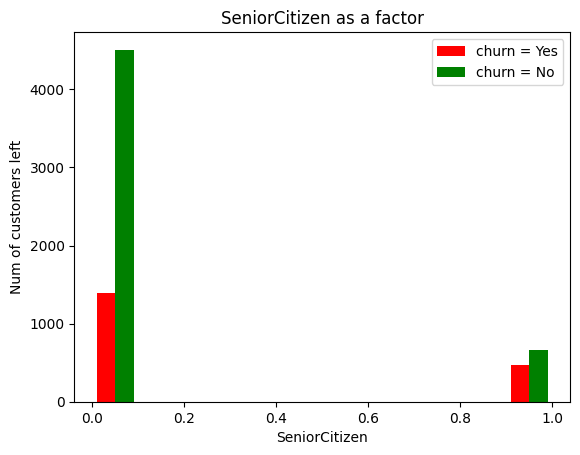

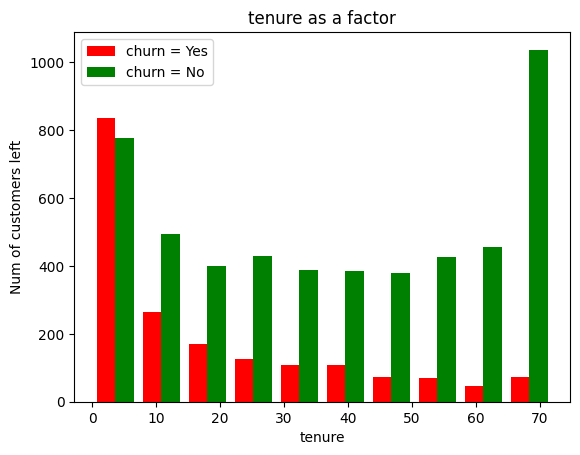

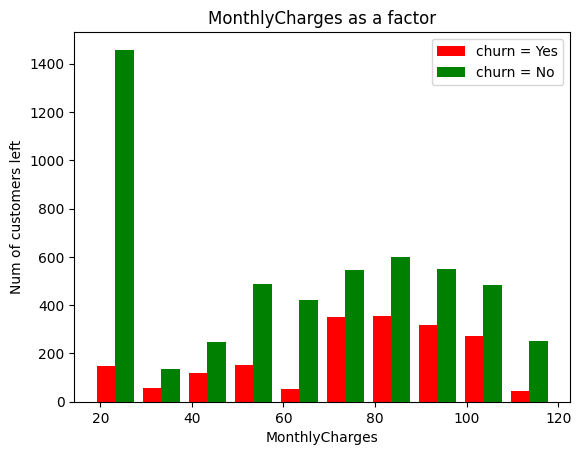

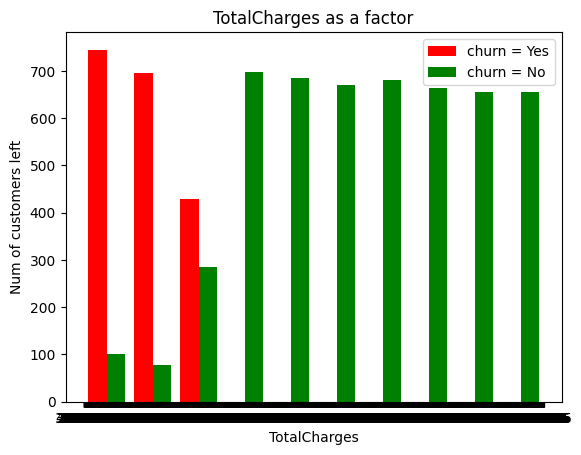

In [15]:
numeric_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

for column in numeric_columns:
    churn_yes = data[data['Churn'] == 'Yes'][column]
    churn_no = data[data['Churn'] == 'No'][column]
    
    plt.hist([churn_yes, churn_no], color=['red', 'green'], label=['churn = Yes', 'churn = No'])
    plt.xlabel(column)
    plt.ylabel('Num of customers left')
    plt.title(f'{column} as a factor')
    plt.legend()
    plt.show()

In [16]:
data1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [17]:
def know_unique(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [18]:
know_unique(data1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [19]:
data1.replace('No phone service', 'No', inplace = True)
data1.replace('No internet service',  'No', inplace = True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_29096\2779205848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.replace('No phone service', 'No', inplace = True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_29096\2779205848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.replace('No internet service',  'No', inplace = True)


In [20]:
know_unique(data1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [21]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup' , 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for column in yes_no_columns:
    data1[column] = data1[column].replace({'Yes': 1, 'No': 0}).astype(int)


C:\Users\Asus\AppData\Local\Temp\ipykernel_29096\2351175526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[column] = data1[column].replace({'Yes': 1, 'No': 0}).astype(int)
C:\Users\Asus\AppData\Local\Temp\ipykernel_29096\2351175526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[column] = data1[column].replace({'Yes': 1, 'No': 0}).astype(int)
C:\Users\Asus\AppData\Local\Temp\ipykernel_29096\2351175526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [22]:
data1['gender'].replace({'Female':0, 'Male':1}, inplace = True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_29096\389290989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['gender'].replace({'Female':0, 'Male':1}, inplace = True)


In [23]:
data1.dtypes

gender                int64
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService      object
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract             object
PaperlessBilling      int32
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [24]:
data2 = pd.get_dummies(data1, columns=['InternetService', 'Contract', 'PaymentMethod'], dtype=int)
data2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [25]:
data2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int32
Dependents                                   int32
tenure                                       int64
PhoneService                                 int32
MultipleLines                                int32
OnlineSecurity                               int32
OnlineBackup                                 int32
DeviceProtection                             int32
TechSupport                                  int32
StreamingTV                                  int32
StreamingMovies                              int32
PaperlessBilling                             int32
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int32
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

In [26]:
data2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [27]:
scaling_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data2[scaling_columns] = scaler.fit_transform(data2[scaling_columns])
data2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [29]:
x = data2.drop('Churn', axis = 'columns')
y = data2.Churn

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 25)

In [72]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(13, input_shape = (26, ), activation = 'relu'),
    keras.layers.Dense(7, activation = 'relu'), 
    keras.layers.Dense(1, activation = 'relu'),
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
             )

model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
176/176 [==============================] - 1s 5ms/step - loss: 1.0887 - accuracy: 0.7397
Epoch 2/100
176/176 [==============================] - 1s 5ms/step - loss: 0.6416 - accuracy: 0.7477
Epoch 3/100
176/176 [==============================] - 1s 5ms/step - loss: 0.5989 - accuracy: 0.7508
Epoch 4/100
176/176 [==============================] - 1s 5ms/step - loss: 0.5687 - accuracy: 0.7465
Epoch 5/100
176/176 [==============================] - 1s 5ms/step - loss: 0.5428 - accuracy: 0.7582
Epoch 6/100
176/176 [==============================] - 1s 5ms/step - loss: 0.5335 - accuracy: 0.7659
Epoch 7/100
176/176 [==============================] - 1s 5ms/step - loss: 0.5275 - accuracy: 0.7739
Epoch 8/100
176/176 [==============================] - 1s 5ms/step - loss: 0.5257 - accuracy: 0.7783
Epoch 9/100
176/176 [==============================] - 1s 5ms/step - loss: 0.5136 - accuracy: 0.7840
Epoch 10/100
176/176 [==============================] - 1s 5ms/step - loss: 0.5121 - accura

Epoch 81/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4260 - accuracy: 0.8098
Epoch 82/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4210 - accuracy: 0.8082
Epoch 83/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4168 - accuracy: 0.8108
Epoch 84/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4165 - accuracy: 0.8144
Epoch 85/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4166 - accuracy: 0.8137
Epoch 86/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4154 - accuracy: 0.8124
Epoch 87/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4159 - accuracy: 0.8108
Epoch 88/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4143 - accuracy: 0.8135
Epoch 89/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4146 - accuracy: 0.8137
Epoch 90/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4142

In [73]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.7974


[0.5224383473396301, 0.7974413633346558]

In [74]:
yp = model.predict(x_test)
yp[:5]

array([[0.        ],
       [0.        ],
       [0.04208172],
       [0.13819416],
       [0.28058282]], dtype=float32)

In [75]:
def y_predict(x):
    y_pred = []
    y = model.predict(x)
    for each_value in y:
        if each_value > 0.5:
            y_pred += [1]
        else:
            y_pred += [0]
    return y_pred

In [76]:
yp1 = y_predict(x_test)
yp1[:5]

[0, 0, 0, 0, 0]

In [77]:
from sklearn.metrics import confusion_matrix, classification_report

In [78]:
print(classification_report(y_test, yp1))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1053
           1       0.62      0.49      0.55       354

    accuracy                           0.80      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



Text(95.72222222222221, 0.5, 'Truth')

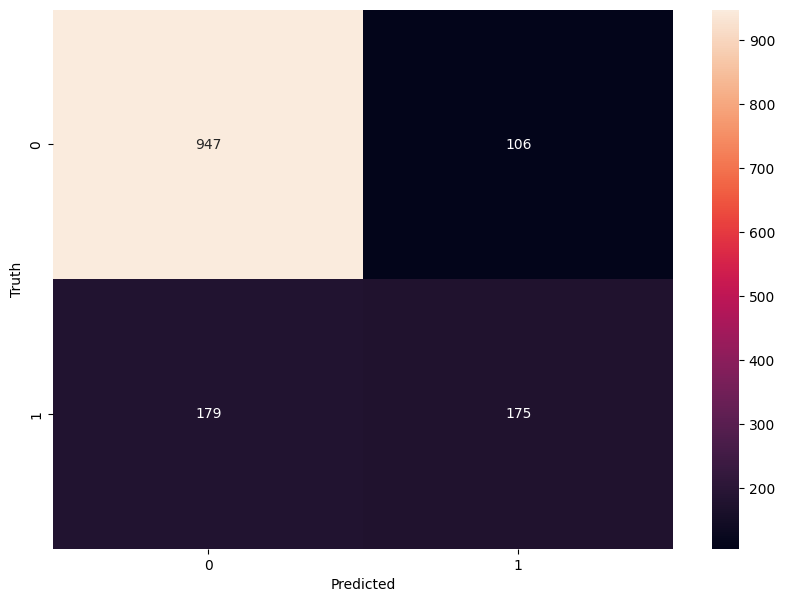

In [79]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_test, predictions = yp1)

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')